In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sys
sys.path.append("../")
from Utils.common_function import common_Fucnation,train_and_evaluate_model,train_and_evaluate_multiple_models


In [29]:
df = pd.read_csv("customer_feedback_satisfaction.csv")
common_fun = common_Fucnation()

In [30]:
df.head(5)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [31]:
df.shape

(38444, 11)

In [32]:
df.head(5)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


### Gender


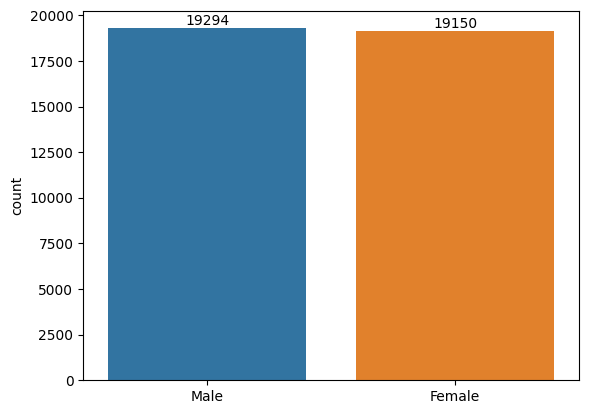

In [33]:
val = df['Gender'].value_counts()
sns.barplot(x = df['Gender'].unique() , y = val, hue=df['Gender'].unique(),)
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

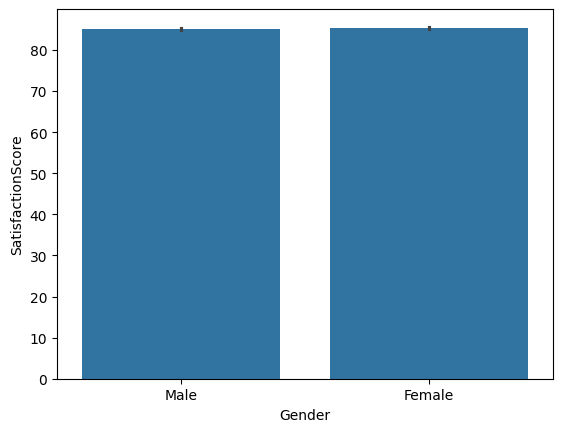

In [34]:
sns.barplot(x=df['Gender'],y=df['SatisfactionScore'])
plt.show()

In [35]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female': 2})

C:\Users\jay\AppData\Local\Temp\ipykernel_13380\3274028157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1, 'Female': 2})


### Country


In [36]:
df['Country'].unique()

array(['UK', 'USA', 'France', 'Germany', 'Canada'], dtype=object)

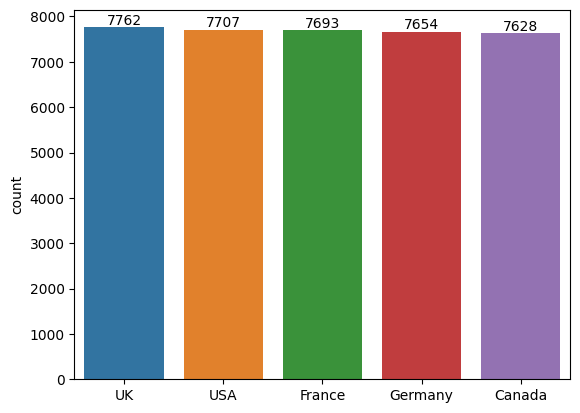

In [37]:
val = df['Country'].value_counts()
sns.barplot(x = df['Country'].unique() , y = val, hue=df['Country'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

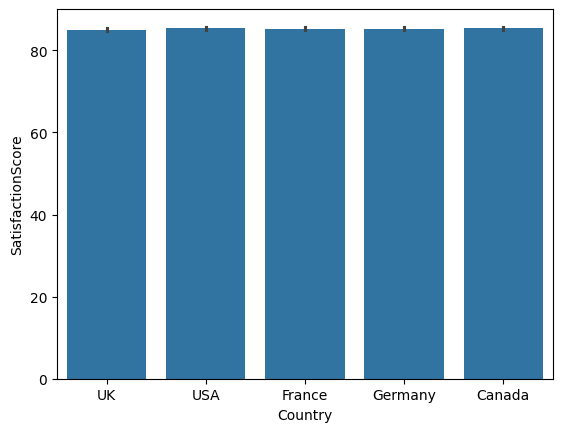

In [38]:
sns.barplot(x=df['Country'],y=df['SatisfactionScore'])
plt.show()

In [39]:
df['Country'] = df['Country'].replace({'UK': 1, 'USA': 2, 'France': 3, 'Germany': 4, 'Canada': 5})

C:\Users\jay\AppData\Local\Temp\ipykernel_13380\3034537288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({'UK': 1, 'USA': 2, 'France': 3, 'Germany': 4, 'Canada': 5})


In [40]:
df.head(3)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,1,1,83094,5,8,5,Low,Bronze,100.0
1,2,69,1,1,86860,10,2,8,Medium,Gold,100.0
2,3,46,2,2,60173,8,10,18,Medium,Silver,100.0


### ProductQuality


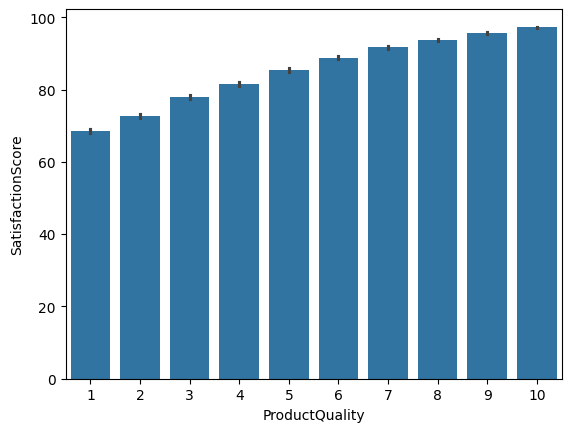

In [41]:
sns.barplot(x=df['ProductQuality'],y=df['SatisfactionScore'])
plt.show()

### ServiceQuality


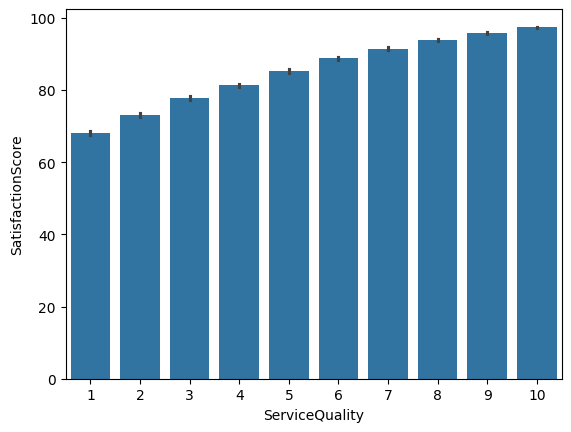

In [42]:
sns.barplot(x=df['ServiceQuality'],y=df['SatisfactionScore'])
plt.show()

### FeedbackScore


In [43]:
df['FeedbackScore'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

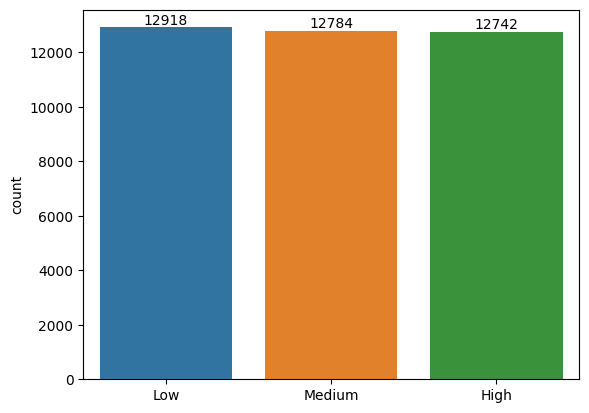

In [44]:
val = df['FeedbackScore'].value_counts()
sns.barplot(x = df['FeedbackScore'].unique() , y = val, hue=df['FeedbackScore'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

In [45]:
df['FeedbackScore'] = df['FeedbackScore'].replace({'Low': 1, 'Medium': 2, 'High': 3})


C:\Users\jay\AppData\Local\Temp\ipykernel_13380\3958293209.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FeedbackScore'] = df['FeedbackScore'].replace({'Low': 1, 'Medium': 2, 'High': 3})


In [46]:
df.head(3)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,1,1,83094,5,8,5,1,Bronze,100.0
1,2,69,1,1,86860,10,2,8,2,Gold,100.0
2,3,46,2,2,60173,8,10,18,2,Silver,100.0


### LoyaltyLevel


In [47]:
df['LoyaltyLevel'].unique()

array(['Bronze', 'Gold', 'Silver'], dtype=object)

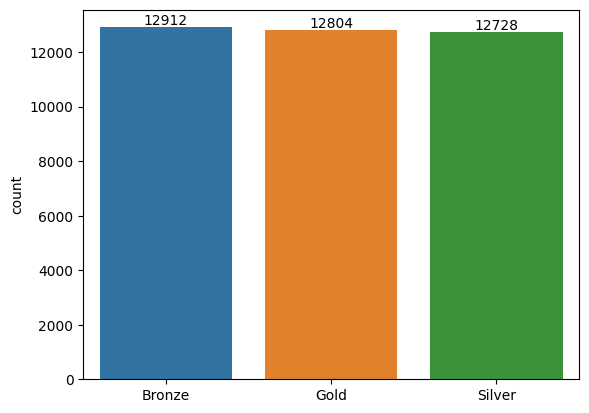

In [48]:
val = df['LoyaltyLevel'].value_counts()
sns.barplot(x = df['LoyaltyLevel'].unique() , y = val, hue=df['LoyaltyLevel'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

In [49]:
df['LoyaltyLevel'] = df['LoyaltyLevel'].replace({'Bronze': 1, 'Gold': 2, 'Silver': 3})


C:\Users\jay\AppData\Local\Temp\ipykernel_13380\428356761.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LoyaltyLevel'] = df['LoyaltyLevel'].replace({'Bronze': 1, 'Gold': 2, 'Silver': 3})


In [50]:
df.head(3)


,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,1,1,83094,5,8,5,1,1,100.0
1,2,69,1,1,86860,10,2,8,2,2,100.0
2,3,46,2,2,60173,8,10,18,2,3,100.0


In [51]:
x = df.drop(columns=['SatisfactionScore'])
y = df['SatisfactionScore']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = [
    # Regressor
    RandomForestRegressor(n_estimators=150,max_depth= 12, min_samples_leaf= 10, min_samples_split= 8),
    LinearRegression(),
    DecisionTreeRegressor(criterion='squared_error',max_depth= 9, min_samples_leaf= 10, min_samples_split= 15),
    GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth= 6,min_samples_leaf=10,min_samples_split=8),
    KNeighborsRegressor()
]

results_reg = train_and_evaluate_multiple_models(models, x_train, x_test, y_train, y_test)

Model: RandomForestRegressor (Regressor) -> R² Score: 0.7781350723034985
Model: LinearRegression (Regressor) -> R² Score: 0.6970132237683215
Model: DecisionTreeRegressor (Regressor) -> R² Score: 0.7402933337265896
Model: GradientBoostingRegressor (Regressor) -> R² Score: 0.78578634210585
Model: KNeighborsRegressor (Regressor) -> R² Score: -0.13068010941997654
